# Project: Communicate Data Findings: USA Flights 1998 vs 2008

## <font color='gray'>Introduction</font>
The project is a part of Udacity Data Analyst Nanodegree program that divided into two major parts. <br>
One for an exploratory data analysis and another for an explanatory data analysis. <br>
We got dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays. <br>
The results focus on data from 1980 and 2008 due to the main purpose, compare some flight activities after 10 years passing. <br>

## <font color='gray'>Table of Contents</font>
<ul>
<li><a href="#Wrangling">1) Wrangling the data</a></li>
<li><a href="#Univariate">2) Univariate Visualization</a></li>
<li><a href="#Bivariate">3) Bivariate Visualization</a></li>
<li><a href="#Multivariate">4) Multivariate Visualization</a></li>
<li><a href="#Explanatory">5) Explanatory Analysis</a></li>    
<li><a href="#Summary">6) Summary Flights Data</a></li> 
<li><a href="#Sources">7) Sources</a></li> 
</ul>

<a id='Wrangling'></a>
## <font color='gray'>Wrangling the data </font>

In [1]:
# import all packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

%matplotlib inline

In [2]:
# read csv files for year 1998 and 2008

f_98 = pd.read_csv('1998.csv')
f_08 = pd.read_csv('2008.csv')

In [3]:
f_98.head()
f_98.shape

(5384721, 29)

In [4]:
f_08.head()
f_08.shape

(7009728, 29)

In [5]:
# join 2 year dataframes to the new dataframe

df = pd.concat([f_98, f_08])
df.shape

(12394449, 29)

In [6]:
# see attributes and type of them

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12394449 entries, 0 to 7009727
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               float64
TaxiOut              float64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtypes: float64(14), int64(10), object(5)
memory usage: 2.8+ GB


#### Variable descriptions from ASA Sections on Statistical Computing | Statistical Graphics<br>
1	Year	1987-2008<br>
2	Month	1-12<br>
3	DayofMonth	1-31<br>
4	DayOfWeek	1 (Monday) - 7 (Sunday)<br>
5	DepTime	actual departure time (local, hhmm)<br>
6	CRSDepTime	scheduled departure time (local, hhmm)<br>
7	ArrTime	actual arrival time (local, hhmm)<br>
8	CRSArrTime	scheduled arrival time (local, hhmm)<br>
9	UniqueCarrier	unique carrier code<br>
10	FlightNum	flight number<br>
11	TailNum	plane tail number<br>
12	ActualElapsedTime	in minutes<br>
13	CRSElapsedTime	in minutes<br>
14	AirTime	in minutes<br>
15	ArrDelay	arrival delay, in minutes<br>
16	DepDelay	departure delay, in minutes<br>
17	Origin	origin IATA airport code<br>
18	Dest	destination IATA airport code<br>
19	Distance	in miles<br>
20	TaxiIn	taxi in time, in minutes<br>
21	TaxiOut	taxi out time in minutes<br>
22	Cancelled	was the flight cancelled?<br>
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br>
24	Diverted	1 = yes, 0 = no<br>
25	CarrierDelay	in minutes<br>
26	WeatherDelay	in minutes<br>
27	NASDelay	in minutes<br>
28	SecurityDelay	in minutes<br>
29	LateAircraftDelay	in minutes<br>



In [7]:
# descriptive statistics of columns

df.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.239445e+07,1.239445e+07,1.239445e+07,1.239445e+07,1.211369e+07,1.239445e+07,1.208513e+07,1.239445e+07,1.239445e+07,1.208208e+07,...,1.239445e+07,1.224280e+07,1.225739e+07,1.239445e+07,1.239445e+07,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2.003656e+03,6.441773e+00,1.571996e+01,3.930923e+00,1.342646e+03,1.325002e+03,1.486354e+03,1.486056e+03,1.708569e+03,1.257328e+02,...,7.316624e+02,6.353673e+00,1.557053e+01,2.274752e-02,2.454809e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,4.956841e+00,3.421871e+00,8.791468e+00,1.988247e+00,4.813849e+02,4.813254e+02,5.077117e+02,5.020137e+02,1.652932e+03,6.974271e+01,...,5.599046e+02,4.737996e+00,1.083695e+01,1.490975e-01,4.948518e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,1.998000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,-3.340000e+02,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.998000e+03,3.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.240000e+02,1.110000e+03,1.110000e+03,5.260000e+02,7.500000e+01,...,3.280000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.008000e+03,6.000000e+00,1.600000e+01,4.000000e+00,1.331000e+03,1.322000e+03,1.517000e+03,1.517000e+03,1.195000e+03,1.080000e+02,...,5.830000e+02,5.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2.008000e+03,9.000000e+00,2.300000e+01,6.000000e+00,1.735000e+03,1.724000e+03,1.915000e+03,1.912000e+03,2.172000e+03,1.560000e+02,...,9.570000e+02,8.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2.008000e+03,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.400000e+03,2.400000e+03,2.400000e+03,9.902000e+03,1.379000e+03,...,4.962000e+03,1.233000e+03,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
# no. of duplicated row(s)

df.duplicated().sum()

4

In [9]:
# drop duplicated row(s)

df.drop_duplicates(inplace=True)

In [10]:
# confirm dedupe

print(df.duplicated().sum())

0


<a id='Univariate'></a>
## <font color='gray'>Univariate data visualization</font>

- Did the whole flight numbers change in 10 years?
- What were the main reasons for cancelled flights?
- How was air times distribution look like?

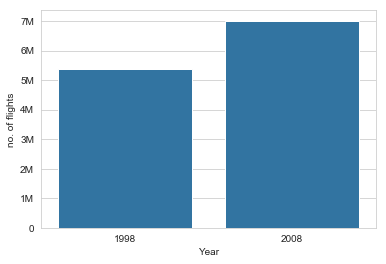

In [11]:
# no. of flights by year
# after 10 years pass in 2008, there were  more flights than 1998 almost 2 million

base_color = sb.color_palette()[0]
sb.countplot(data = df, x= 'Year', color = base_color);
plt.yticks([0, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000], 
           ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']);
plt.ylabel('no. of flights');

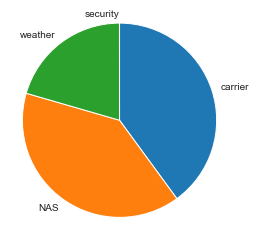

In [12]:
# reason for Cancelled flights
# NAS and carrier reasons were the most cancelled reference

sorted_counts = df['CancellationCode'].value_counts()
plt.pie(sorted_counts, labels = ['carrier', 'NAS', 'weather',  'security'], startangle = 90,
        counterclock = False);
plt.axis('square');

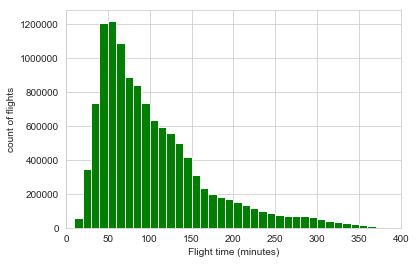

In [13]:
# airtime distribution
# it shos Right-skewed distribution
# Most flights had 50-100 minutes time to fly

bins = np.arange(0, df['AirTime'].max(), 10)
plt.hist(df['AirTime'], bins = bins, color = 'green');
plt.xlim(0, 400);
plt.xlabel('Flight time (minutes)');
plt.ylabel('count of flights');

<a id='Bivariate'></a>
## <font color='gray'>Bivariate data visualization</font>
- How was the departure and arrival delay related?
- Did Air time cause the arrival delay?
- What are top 10 origin airports delay in departure?
- What are top 10 destination airports delay in Arrival?
- What wes the distance distribution look like by month?
- How were the departure time in 24 hour system compare 2 years?
- How were the arrival time in 24 hour system compare 2 years?
- Were the departure delays affected by month?

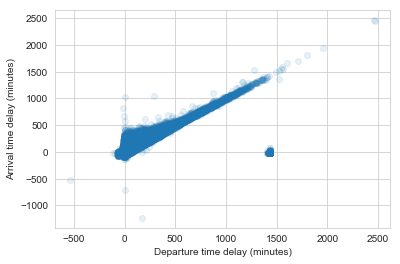

In [14]:
# scatter plot between departure and arrival time delay
# it shows the nearly perfect positive relationship

plt.scatter(data = df, x = 'DepDelay', y= 'ArrDelay', alpha = 0.1);
plt.xlabel('Departure time delay (minutes)');
plt.ylabel('Arrival time delay (minutes)');

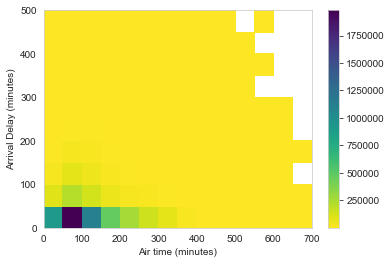

In [15]:
# heat maps plot between Air time and arrival delay
# 50-100 minutes air time produced the most arrival delay
# we can't conclude that air time causes any delay right now because 50-100 minutes flights are the most popular 
# so lots of flights produced lots of delays

bins_x = np.arange(0, df['AirTime'].max(), 50)
bins_y = np.arange(0, df['ArrDelay'].max(), 50)
plt.hist2d(data = df, x = 'AirTime', y= 'ArrDelay', cmin = 0.5,
          cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar();
plt.xlabel('Air time (minutes)');
plt.ylabel('Arrival Delay (minutes)');
plt.xlim(0, 700);
plt.ylim(0, 500);

In [16]:
# find top 10 departure delay in origin airport

origin_delay = df.groupby('Origin')['DepDelay'].mean().sort_values(ascending = False)
origin_delay.head(10)

Origin
ACK    29.717540
PUB    27.000000
CEC    24.186207
PIR    22.800000
SPI    22.314516
OTH    21.765531
LMT    20.046559
ACY    18.548673
CIC    17.157740
RDD    16.140768
Name: DepDelay, dtype: float64

In [17]:
most_ori_delay = ['ACK', 'PUB', 'CEC', 'PIR', 'SPI', 'OTH', 'LMT', 'ACY', 'CIC', 'RDD']
df_most_ori_delay = df.loc[df['Origin'].isin(most_ori_delay)]

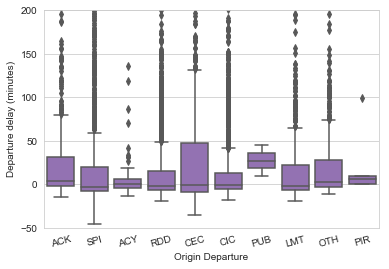

In [18]:
# box plot of most depature delay airport

base_color = sb.color_palette()[4]
sb.boxplot(data = df_most_ori_delay, x = 'Origin', y = 'DepDelay', color = base_color);
plt.xticks(rotation = 15);
plt.ylim(-50, 200);
plt.xlabel('Origin Departure');
plt.ylabel('Departure delay (minutes)');

In [19]:
# find top 10 arrival delay in destination airport

dest_delay = df.groupby('Dest')['ArrDelay'].mean().sort_values(ascending = False)
dest_delay.head(10)

Dest
MQT    30.563365
OTH    26.792339
ACK    21.980088
SPI    20.725089
CIC    19.905077
EYW    18.245473
CMI    16.697869
EWR    16.315907
LMT    16.200405
HHH    16.167506
Name: ArrDelay, dtype: float64

In [20]:
most_des_delay = ['MQT', 'OTH', 'ACK', 'SPI', 'CIC', 'EYW', 'CMI', 'EWR' 'LMT', 'HHH']
df_most_des_delay = df.loc[df['Dest'].isin(most_des_delay)]

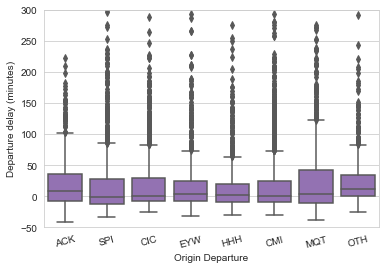

In [21]:
# box plot of most arrival delay airport

base_color = sb.color_palette()[4]
sb.boxplot(data = df_most_des_delay, x = 'Dest', y = 'ArrDelay', color = base_color);
plt.xticks(rotation = 15);
plt.xlabel('Origin Departure');
plt.ylabel('Departure delay (minutes)');
plt.ylim(-50, 300);

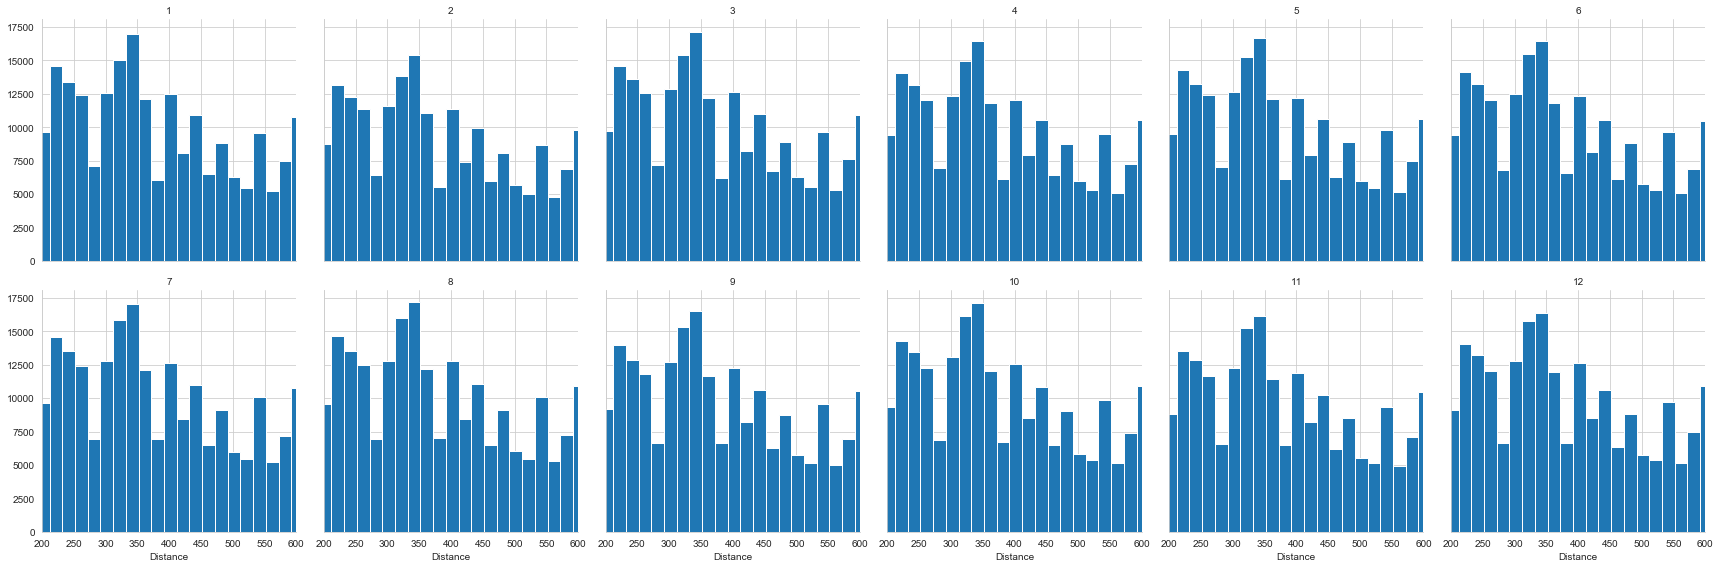

In [22]:
# faceted histograms show Distance by month for Year 1998
# only 200 to 600 miles that can see some patterns
# little drop in flight numbers on Feb, Apr, May, Jun, Nov and Dec
# but overall pattern were still the same through the year

g = sb.FacetGrid(data = f_98, col = 'Month', col_wrap = 6, height = 4, xlim = (200, 600))
g.map(plt.hist, 'Distance', bins = np.arange(12, df['Distance'].max(), 20));
g.set_titles('{col_name}');

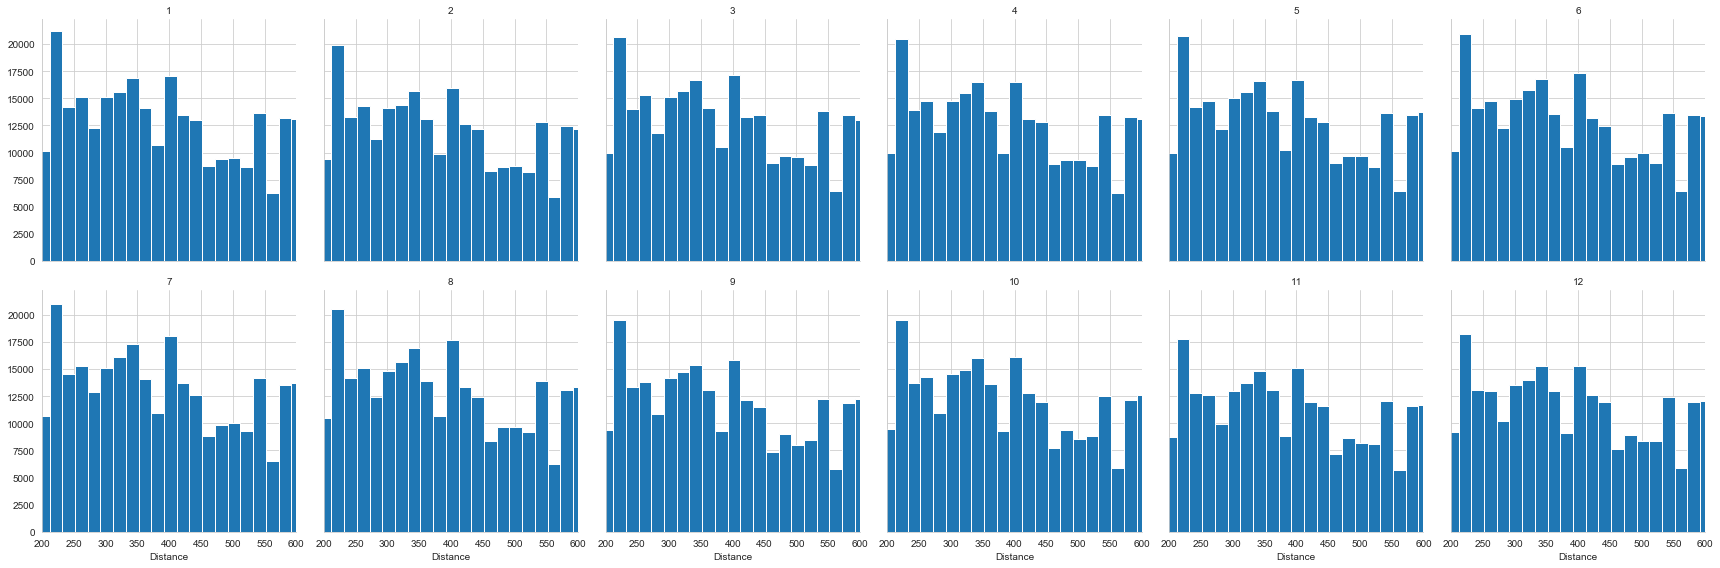

In [23]:
# Faceted histograms show Distance by month for Year 2008
# only 200 to 600 miles that can see some patterns
# but overall pattern were still the same through the year
# different patterns appear when compare 2 years graph

g = sb.FacetGrid(data = f_08, col = 'Month', col_wrap = 6, height = 4, xlim = (200, 600))
g.map(plt.hist, 'Distance', bins = np.arange(12, df['Distance'].max(), 20));
g.set_titles('{col_name}');

<Figure size 576x432 with 0 Axes>

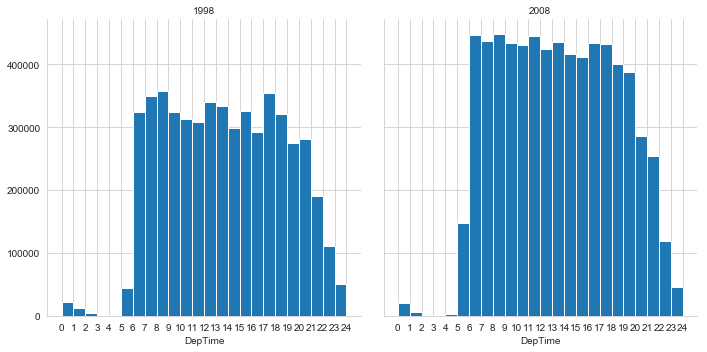

In [24]:
# departure times in 24 hour system compare 2 years
# no. of flights increase dramatically between 5:00 - 20:00 in this 10 years

plt.figure(figsize = [8,6]);
g = sb.FacetGrid(data = df, col = 'Year', col_wrap = 2, height = 5);
g.map(plt.hist, 'DepTime', bins = np.arange(0, df['DepTime'].max()+100, 100));
g.set_titles('{col_name}');
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]);

<Figure size 576x432 with 0 Axes>

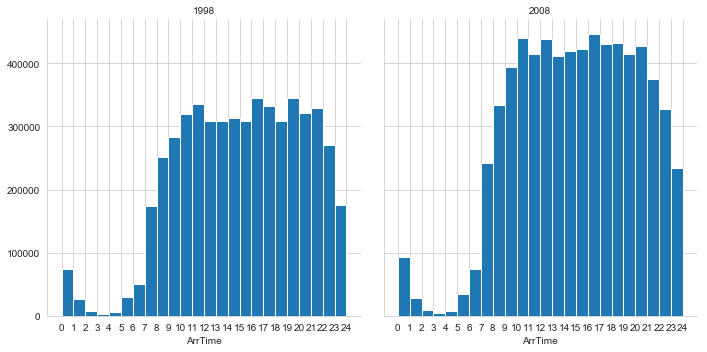

In [25]:
# arrival times in 24 hour system compare 2 years
# no. of flights increase dramatically between 7:00 - 24:00 in this 10 years

plt.figure(figsize = [8,6]);
g = sb.FacetGrid(data = df, col = 'Year', col_wrap = 2, height = 5)
g.map(plt.hist, 'ArrTime', bins = np.arange(0, df['ArrTime'].max()+100, 100));
g.set_titles('{col_name}');
plt.xticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400],
          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]);

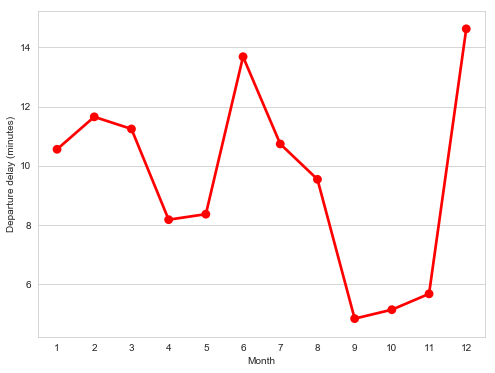

In [26]:
# point plot Departure delay by month
# the departure delays affected by month, they happened more minutes in June and December

plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'Month', y = 'DepDelay', join = True, color = 'Red')
plt.ylabel('Departure delay (minutes)');

<a id='Multivariate'></a>
## <font color='gray'>Multivariate data visualization</font>
- What day of week and what month that departure delay happened most?
- After 10 years pass the departure delays decreased or not?
- What airport city was the home of more delay in both departure and arrival?
- How were the relationship of delay reasons?

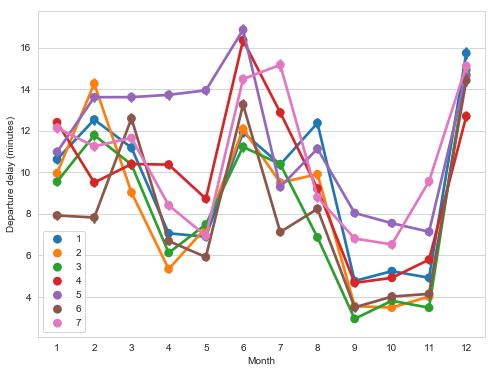

In [36]:
# point plot Departure delay by month and Day of Week
# delay happended in Friday more then any days of week
# but for December delay happended so high for every days

plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'Month', y = 'DepDelay', hue = 'DayOfWeek', join = True)
plt.ylabel('Departure delay (minutes)');
plt.legend();

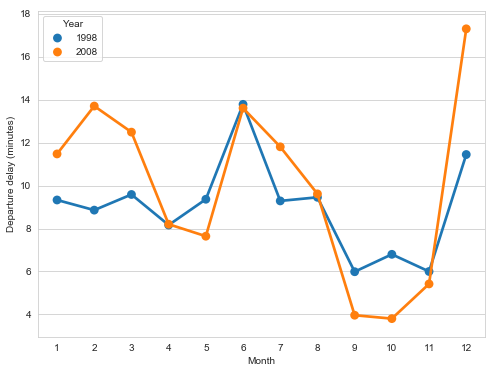

In [28]:
# point plot Departure delay by year

plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df, x = 'Month', y = 'DepDelay', hue = 'Year', join = True)
plt.ylabel('Departure delay (minutes)');

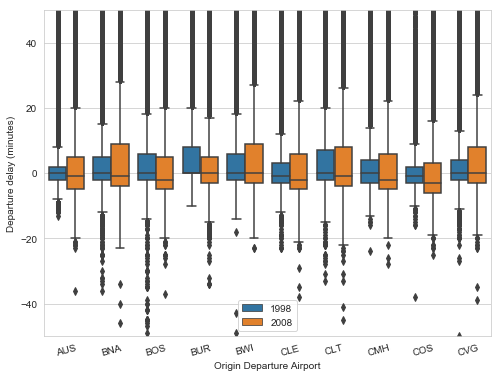

In [29]:
# clustered box plot of top departure delay airports

plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = 'Origin', y = 'DepDelay', hue = 'Year')
plt.legend();
plt.xticks(rotation = 15);
plt.xlim(-0.5, 9.5);
plt.ylim(-50, 50);
plt.xlabel('Origin Departure Airport');
plt.ylabel('Departure delay (minutes)');

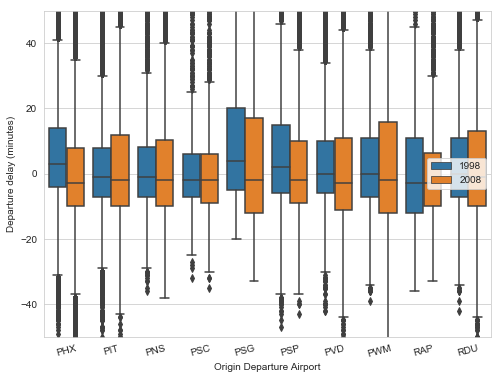

In [30]:
# clustered box plot of top arrival delay airports

plt.figure(figsize = [8,6])
sb.boxplot(data = df, x = 'Dest', y = 'ArrDelay', hue = 'Year')
plt.legend();
plt.xticks(rotation = 15);
plt.xlim(-0.5, 9.5);
plt.ylim(-50, 50);
plt.xlabel('Origin Departure Airport');
plt.ylabel('Departure delay (minutes)');

C:\Users\Yongsvw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Yongsvw\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


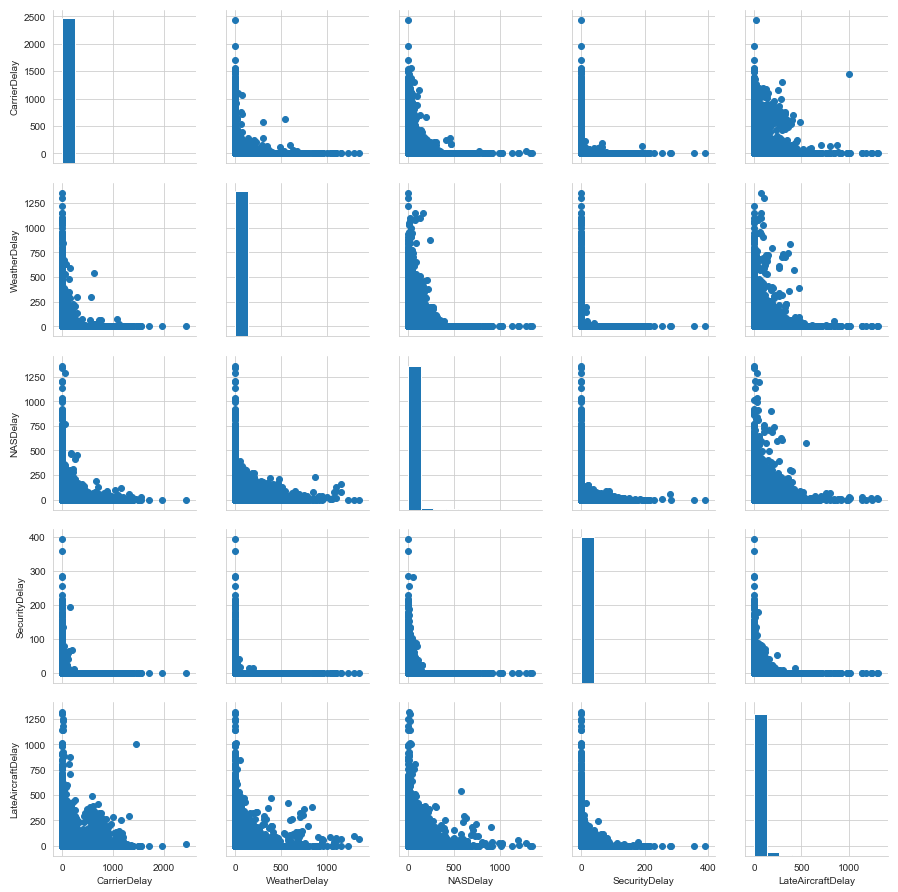

In [31]:
# plot matrix of delay types

delays = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
g = sb.PairGrid(data = df, vars = delays);
g = g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

<a id='Explanatory'></a>
## <font color='gray'>Explanatory visualization</font>
- select insights got from exploratory part to polish plots so that they can be presented
- show the explanatory visualization in slide deck

<a id='Summary'></a>
## <font color='gray'>Summary</font>
- First of all, flights increased largely in a decade due to lifestyle of people and lower cost of energy so they directly effected to some flight hours
- From EDA we know that number of flights increased dramatically between 5:00 - 20:00 for departing and 7:00 - 24:00 for arriving
- The data shows only USA flights so most of them are domestic flights happened in 200 - 600 miles or 50 - 100 minutes air times
- Departure delay affected by month considerably they happened more minutes in June and December so the seasonal effect occured.
- The delay cycle seem to be changed in a decade that can see in the high average delays in December 2008 much higher than the same month of 1998
- Friday produced more delay than other days of week espeially in March, April, May and June
- Spreading of arrival delays were wider than departure delays due to the air times
- Petersburg James A. Johnson Airport (PSG) of Alaska was the home of widest range in arrival delays both 1998 and 2008
- Late of aircraft was the reason that had most correlation rate with other reasons so it might be the leading reason of delays
- Security delay is not related to other delay reasons

<a id='Sources'></a>
## <font color='gray'>Sources</font>
- amstat.org: http://stat-computing.org/dataexpo/2009/the-data.html
- PSG: https://en.wikipedia.org/wiki/Petersburg_James_A._Johnson_Airport
- seaborn: https://seaborn.pydata.org
- matplotlib: https://matplotlib.org
- pandas: https://pandas.pydata.org